# Polar 1-Manifold Toy Datasets

> Collections of 1-Manifold toy datasets in 3 dimensional space generated from polar equations

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FlowNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

In [ ]:
# hide
from FlowNet.datasets import plot_directed_2d, plot_directed_3d

We first introduce two useful helper functions. The first function tilt the 1-manifold in 2d plane into 3d space. The second function add noise to data positions.

In [ ]:
# export
# Tilt 2d plane into 3d space
def xy_tilt(X, flows, xtilt=0, ytilt=0):
    xrotate = np.array([[1,              0,             0],
                        [0,  np.cos(xtilt), np.sin(xtilt)],
                        [0, -np.sin(xtilt), np.cos(xtilt)]])
    yrotate = np.array([[np.cos(ytilt), 0, -np.sin(ytilt)],
                        [            0, 1,              0],
                        [np.sin(ytilt), 0,  np.cos(ytilt)]])
    X = X @ xrotate @ yrotate
    flows = flows @ xrotate @ yrotate
    return X, flows

In [ ]:
# export
def add_noise(X, sigma=0):
    return X + np.random.normal(0, sigma, X.shape)

## Circles

In [ ]:
# export
def directed_circle(num_nodes=500, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    # sample random angles between 0 and 2pi
    thetas = np.random.uniform(0, 2*np.pi, num_nodes)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * radius
    y = np.sin(thetas) * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas)
    v = np.sin(alphas)
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

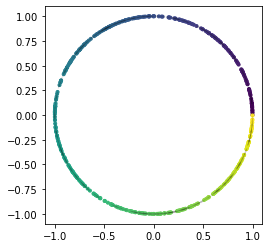

In [ ]:
# collapse
X, flows, labels = directed_circle()
plot_directed_2d(X, flows, labels)

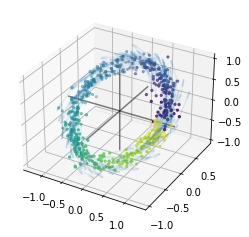

In [ ]:
# collapse
X, flows, labels = directed_circle(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels, origin=True)

## Naive Spirals

In [ ]:
# export
def directed_spiral(num_nodes=500, num_spirals=1.5, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    # sample random angles between 0 and num_spirals * 2pi
    thetas = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * thetas * radius
    y = np.sin(thetas) * thetas * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas) * thetas
    v = np.sin(alphas) * thetas
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

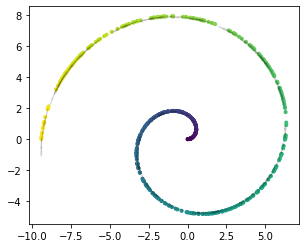

In [ ]:
# collapse
X, flows, labels = directed_spiral()
plot_directed_2d(X, flows, labels)

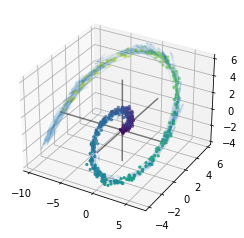

In [ ]:
# collapse
X, flows, labels = directed_spiral(xtilt=np.pi/4, sigma=0.2)
plot_directed_3d(X, flows, labels, origin=True)

## Uniform Spirals

In [ ]:
# export 
def directed_spiral_uniform(num_nodes=500, num_spirals=1.5, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    # sample random angles between 0 and num_spirals * 2pi
    t1 = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
    t2 = np.random.uniform(0, num_spirals*2*np.pi, num_nodes)
    thetas = np.maximum(t1, t2)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * thetas * radius
    y = np.sin(thetas) * thetas * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas)
    v = np.sin(alphas)
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

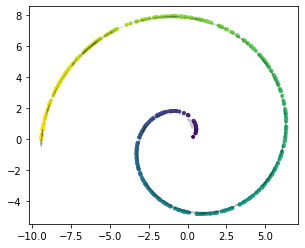

In [ ]:
# collapse
X, flows, labels = directed_spiral_uniform()
plot_directed_2d(X, flows, labels)

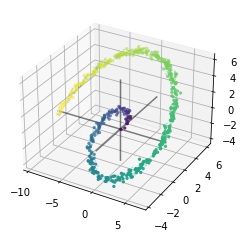

In [ ]:
# collapse
X, flows, labels = directed_spiral_uniform(xtilt=np.pi/4, sigma=0.2)
plot_directed_3d(X, flows, labels, origin=True)

## Sklearn Spirals

In [ ]:
# export
def directed_spiral_sklearn(num_nodes=500, num_spirals=1.5, radius=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    # sample random angles between 0 and num_spirals * 2pi
    thetas = np.random.uniform(num_spirals*np.pi, num_spirals*3*np.pi, num_nodes)
    thetas = np.sort(thetas)
    labels = thetas
    # calculate x and y coordinates
    x = np.cos(thetas) * thetas * radius
    y = np.sin(thetas) * thetas * radius
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    # calculate the angle of the tangent
    alphas = thetas + np.pi/2
    # calculate the coordinates of the tangent
    u = np.cos(alphas) * thetas
    v = np.sin(alphas) * thetas
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

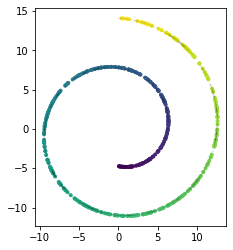

In [ ]:
# collapse
X, flows, labels = directed_spiral_sklearn()
plot_directed_2d(X, flows, labels)

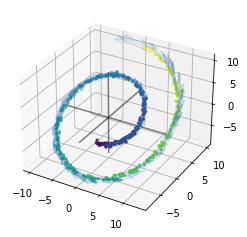

In [ ]:
# collapse
X, flows, labels = directed_spiral_sklearn(xtilt=np.pi/4, sigma=0.2)
plot_directed_3d(X, flows, labels, origin=True)